# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [19]:
!python -m pip install kaggle==1.6.12


Defaulting to user installation because normal site-packages is not writeable


In [20]:
!pip install --target=/workspace ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached certifi-2024.6.2-py3-none-any.whl (164 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.11.2 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.0 which is incompatible.


In [21]:
!pip install -U matplotlib
!pip install numpy==1.26.4

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*  There are two problem statements I would like to solve with my datasets. The first one is to identify how many artists on Rolling Stone's top 500 list are also included in Spotify's most played list. The other problem I would like to solve is identifying which songs made the list in both datasets.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: HTML

Method: Gathered, extracted, and parsed HTML data from a URL (https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Songs/500) using BeautifulSoup. 


Dataset variables:

*   Variable 1: Artist - can be used to identify artists that have more than one song on the top 500 list in dataset 1. 
*   Variable 2: Song - a unique variable that can be used with dataset 2 to identify songs that consumers are playing most on spotify. 

Dataset description:
*   This dataset was chosen because it provided a clear way of scraping a website to pull in table data. The dataset helps to identify artists and songs on the top 500 list. Columns in this dataset include Rank, Song, Artist,and Year.


In [1]:
#data gathering and loading method
#import libraries needed for data wrangling and analysis
import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt


#Programmatically make a GET request
url = 'https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Songs/500'
songs = requests.get(url)

**Note:** Restart the kernel to use updated package(s).

In [4]:
#Use BeautifulSoup to parse the data
soup_songs = BeautifulSoup(songs.text,'html.parser')
#Find the table containing the Top 500 Songs
table = soup_songs.find('table',class_='wikitable sortable')

In [5]:
#Identify the dataset headers by searching for each 'th' tag
headers = table.find_all('th')
headers

[<th>Rank
 </th>,
 <th>Song
 </th>,
 <th>Artist
 </th>,
 <th>Year
 </th>]

In [6]:
#Strip the data of html code
find_headers = [title.text.strip() for title in headers]
print(find_headers)

['Rank', 'Song', 'Artist', 'Year']


In [7]:
#Create a dataframe with the headers
df = pd.DataFrame(columns=find_headers)

In [8]:
#Identify the dataset columns by searching for each 'tr' tag
columns = table.find_all('tr')

In [9]:
#Identify the values for each record using the 'td' tag
for row in columns[1:]:
    rows = row.find_all('td')
    row_data= [data.text.strip() for data in rows]
    
    length =len(df)
    df.loc[length] = row_data
    
df

,Rank,Song,Artist,Year
0,500,Stronger,Kanye West,2007
1,499,Baby Love,The Supremes,1964
2,498,Pancho and Lefty,Townes Van Zandt,1972
3,497,Truth Hurts,Lizzo,2017
4,496,Without You,Harry Nilsson,1971
...,...,...,...,...
495,5,Smells Like Teen Spirit,Nirvana,1991
496,4,Like a Rolling Stone,Bob Dylan,1965
497,3,A Change Is Gonna Come,Sam Cooke,1964
498,2,Fight the Power,Public Enemy,1989


In [10]:
#Insert the dataframe values into a csv file
df.to_csv('RollingStoneTop500Songs.csv',index=False)

In [11]:
#FILL IN 2nd data gathering and loading method
df_csv = pd.read_csv('SpotifyMostPlayedSongs.csv')

#### Dataset 2

Type: CSV File

Method: The data was gathered using the "Downloading files" method from a csv file. 


Dataset variables:

*   Variable 1: ArtistAndTitle - can be used to identify artists and song titles. 
*   Variable 2: Streams - This values tells us the total number of times this song was streamed. 

Dataset description:
*   This dataset was chosen because it compliments the data in dataset 1 and helps with resolving our problem statements. This dataset has almost 2500 records, which allows for more analysis to be performed. Columns included in this dataset are ArtistAndTitle, Stream, and Daily. 

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [ ]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Uniqueness

**Quality Issue 1: Uniqueness**

I first inspected the data visually using the Notepad ++ text editor to see if there were any duplicate values. I suspected there were, but wanted a programmatic way to verify if this is true. 
In the code cells below, I use the .duplicated() function to check for duplicates. The output verified that rows 2499, 2500, 2501, and 2502 all had duplicate values.

In [ ]:
#Inspecting the dataframe visually - this was done using a text editor called Notepad ++

In [14]:
#Inspecting the dataframe programmatically
df_csv.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2498    False
2499     True
2500     True
2501     True
2502     True
Length: 2503, dtype: bool

**Issues and justification:**

I identified two issues in the df_csv dataframe. The first issue was completeness and the second issue was uniqueness. I performed both visual and programmatic inspections to identify these data quality issues. The programmatic inspections I used were the .duplicated() and .info() functions.

### Quality Issue 2: Completeness

**Quality Issue 2: Completeness**

In the code cells below, I start by inspecting the data visually using .head(). Here we find there is a data completeness issue. Reviewing the output of that method, we've identified there is at least 1 missing value in the Daily column that will need to be cleaned up. 

I then use the .info() function to programmatically check if there are more records with missing values. The output shows there are 2503 total records and the Daily column only has 2490 records. This means that column is missing 13 values for that field.

In [12]:
#Inspecting the dataframe visually to find any missing values
df_csv.head(15)

,ArtistAndTitle,Streams,Daily
0,The Weeknd - Blinding Lights,4297434813,1914133.0
1,Ed Sheeran - Shape of You,3918746202,1042245.0
2,Lewis Capaldi - Someone You Loved,3441950617,1615795.0
3,Post Malone - Sunflower,3373282054,1663595.0
4,Harry Styles - As It Was,3328502433,3266754.0
5,The Weeknd - Starboy,3307642948,1799877.0
6,Drake - One Dance,3205192870,1573581.0
7,The Kid LAROI - STAY,3121237658,NaN
8,Tones And I - Dance Monkey,3076532398,614284.0
9,Imagine Dragons - Believer,3017873664,1294031.0


In [13]:
#Inspecting the dataframe programmatically to check how many records have missing values in the dataset
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArtistAndTitle  2503 non-null   object 
 1   Streams         2503 non-null   int64  
 2   Daily           2490 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.8+ KB


Issue and justification: A data completeness issue was identified when programmatically analyzing the dataset. There is are a few missing values in the Daily column that will need to be addressed.

### Tidiness Issue 1: Different value types for data of the same format

In [17]:
#Inspected the dataframe visually 
df_csv.sample(10)

,ArtistAndTitle,Streams,Daily
2041,T.I. - Live Your Life,552812799,210353.0
600,Doja Cat - Streets,1061722096,544747.0
2461,Matt Sassari - Give It To Me,485213778,947492.0
2242,Quevedo - VISTA AL MAR,514769386,264299.0
1972,Adele - Oh My God,563881935,192033.0
2438,Kid Rock - All Summer Long,488415408,343194.0
267,Rihanna - Needed Me,1489897207,736512.0
515,Ice Cube - It Was A Good Day,1133462530,779830.0
1969,Band Aid - Do They Know It's Christmas?,564190874,8423.0
168,Maroon 5 - Maps,1687227627,1231446.0


In [18]:
#Inspecting the dataframe programmatically
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArtistAndTitle  2503 non-null   object 
 1   Streams         2503 non-null   int64  
 2   Daily           2490 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.8+ KB


Issue and justification: One issue I identified was different value types for data of the same format. The Streams and Daily columns are both whole numbers. When inspecting the data visually using the .sample() function to view a random sample of the data. 

### Tidiness Issue 2: Multiple variables for a single column

In [15]:
#Inspecting the dataframe visually
df_csv.tail()

,ArtistAndTitle,Streams,Daily
2498,Lil Uzi Vert - Sanguine Paradise,480051104,82257.0
2499,Taylor Swift - Cruel Summer,2216869138,3276212.0
2500,Arctic Monkeys - I Wanna Be Yours,2210319883,2432778.0
2501,J Balvin - In Da Getto,485804630,178010.0
2502,"Tame Impala - New Person, Same Old Mistakes",485715098,331219.0


In [16]:
#Inspecting the dataframe programmatically
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ArtistAndTitle  2503 non-null   object 
 1   Streams         2503 non-null   int64  
 2   Daily           2490 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.8+ KB


Issue and justification: I inspected the dataset for data tidiness visually using the .tail() function, and programmatically using the XX function. The first tidiness issue I found was that the ArtistAndTitle column contains multiple variables in one column and needs to be separated into different columns. I programmatically used the .info() function to check the data types to verify they were different. I also visually inspected the dataset using the .tail() 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [20]:
#Make a copy of the first dataset to ensure the raw dataframes are not impacted
df_csv_clean = df_csv.copy()


In [19]:
#Make a copy of the first dataset to ensure the raw dataframes are not impacted
df_clean = df.copy()

### **Quality Issue 1: Uniqueness**

In [29]:
#Apply the cleaning strategy to remove duplicates
#Remove the values where the duplicates are in the Name and Age columns
#By default, drop_duplicates() keep the first occurrence
#remove_dup = #df_csv_clean.drop_duplicates(subset=['Name', 'Age'])

df_csv_clean.drop_duplicates(subset='ArtistAndTitle',keep='first',inplace=True)
df_csv_new = df_csv_clean.duplicated()

In [30]:
#Validate the cleaning was successful by grabbing a count of duplicates
dup_csv_count = df_csv_new.sum()
print(dup_csv_count)

0


Justification: Used the .drop_duplicates() method to remove duplicate values. I only need the ArtistAndTitle column to be unique, so the first instance of a duplicate value was kept, while the second instance was deleted from the clean dataframe. 

### **Quality Issue 2: Completeness**

In [34]:
#Apply the cleaning strategy to replace null values
df_csv_clean['Daily'].fillna("Unknown",inplace=True)

In [35]:
#Validate the cleaning was successful
df_csv_clean.head(20)

,ArtistAndTitle,Streams,Daily
0,The Weeknd - Blinding Lights,4297434813,1914133.0
1,Ed Sheeran - Shape of You,3918746202,1042245.0
2,Lewis Capaldi - Someone You Loved,3441950617,1615795.0
3,Post Malone - Sunflower,3373282054,1663595.0
4,Harry Styles - As It Was,3328502433,3266754.0
5,The Weeknd - Starboy,3307642948,1799877.0
6,Drake - One Dance,3205192870,1573581.0
7,The Kid LAROI - STAY,3121237658,Unknown
8,Tones And I - Dance Monkey,3076532398,614284.0
9,Imagine Dragons - Believer,3017873664,1294031.0


Justification: The Daily column had some values missing. I wanted these missing values to display as unknown. Used the .fillna() method to replace null values with the keyword "unknown". 

### **Tidiness Issue 1: Different value types for data of the same format**

In [43]:
#FILL IN - Apply the cleaning strategy to remove the Streams and Daily columns
#FILL IN - Apply the cleaning strategy by dropping columns
#Drop an entire column when almost all of the values (such as 95-98% of values) are missing in a column. You can use df.drop('COLUMN_NAME', axis=1).
df_csv_clean.drop(['Streams','Daily'],axis=1, inplace=True)

KeyError: "['Streams', 'Daily'] not found in axis"

In [44]:
#FILL IN - Validate the cleaning was successful
print(df_csv_clean)

                                      ArtistAndTitle
0                       The Weeknd - Blinding Lights
1                          Ed Sheeran - Shape of You
2                  Lewis Capaldi - Someone You Loved
3                            Post Malone - Sunflower
4                           Harry Styles - As It Was
...                                              ...
2494                          Bad Bunny - Solo de Mi
2495                   Ludovico Einaudi - Experience
2496        Los Ángeles Azules - Nunca Es Suficiente
2497  JVKE - this is what falling in love feels like
2498                Lil Uzi Vert - Sanguine Paradise

[2477 rows x 1 columns]


Justification: These columns are not needed for the final output and therefore should be removed from the dataset. 

### **Tidiness Issue 2: Multiple variables for a single column**

In [82]:
#Apply the cleaning strategy to separate the ArtistAndTitle into two columns
df_csv_clean_final = df_csv_clean['ArtistAndTitle'].str.rsplit(" - ", n=1, expand=True)

In [83]:
#Rename the new separated columns
df_csv_cleaned = df_csv_clean_final.rename(columns={0:'Artist',1:'Song'})

In [84]:
#Validate the cleaning was successful
df_csv_cleaned.head(110)

,Artist,Song
0,The Weeknd,Blinding Lights
1,Ed Sheeran,Shape of You
2,Lewis Capaldi,Someone You Loved
3,Post Malone,Sunflower
4,Harry Styles,As It Was
...,...,...
105,Shawn Mendes,Stitches
106,Coldplay,The Scientist
107,a-ha,Take on Me
108,Lil Nas X,MONTERO (Call Me By Your Name)


Justification: The ArtistAndTable column contained multiple variables in a single column. These fields will be used to join to the other dataset later, so it needed to be split into separate columns. The method used was to ensure we split the column by the last - because there are some artist names that had a - in them.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [ ]:
#FILL IN - Remove unnecessary variables and combine datasets
#merge
#merged = pd.merge(df_csv_clean ,df_clean) -- this is an inner join
#merged.head(10)
#ehf here is a group by example: groupbyex = merged.groupby('column name',sort=False,)['column name to aggregate'].agg(['sum','mean'])

In [85]:
#All unnecessary variables have been resolved in the data cleaning and tidiness steps
#Adding a count column to track song counts 
df_csv_cleaned['Count'] = 1
df_csv_cleaned.head()

,Artist,Song,Count
0,The Weeknd,Blinding Lights,1
1,Ed Sheeran,Shape of You,1
2,Lewis Capaldi,Someone You Loved,1
3,Post Malone,Sunflower,1
4,Harry Styles,As It Was,1


In [91]:
#merge1 = df_clean({'Rank','Artist','Song','Year'})
#merge2= df_csv_cleaned({'Artist','Song', sum('Count')})
mergeddf_artist = pd.merge(df_clean, df_csv_cleaned, on=['Artist'],how='inner')
artistcount = mergeddf_artist.groupby('Artist').sum('Count')
artistcount.head(150)

,Count
Artist,
2Pac,5
50 Cent,6
ABBA,3
AC/DC,5
Adele,14
...,...
U2,12
Van Halen,1
Van Morrison,1


In [92]:
mergeddf_song = pd.merge(df_clean, df_csv_cleaned, on=['Song'],how='inner')
mergeddf_song.head(150)

,Rank,Song,Artist_x,Year,Artist_y,Count
0,500,Stronger,Kanye West,2007,Kanye West,1
1,497,Truth Hurts,Lizzo,2017,Lizzo,1
2,496,Without You,Harry Nilsson,1971,Avicii,1
3,495,You're So Vain,Carly Simon,1972,Carly Simon,1
4,494,Time After Time,Cyndi Lauper,1983,Cyndi Lauper,1
...,...,...,...,...,...,...
134,12,Superstition,Stevie Wonder,1972,Stevie Wonder,1
135,10,Hey Ya!,Outkast,2003,Outkast,1
136,9,Dreams,Fleetwood Mac,1977,Fleetwood Mac,1
137,5,Smells Like Teen Spirit,Nirvana,1991,Nirvana,1


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [93]:
#Saving the data frames to csv
mergeddf_song.to_csv('clean_song_count.csv')
artistcount.to_csv('clean_artist_count.csv')

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

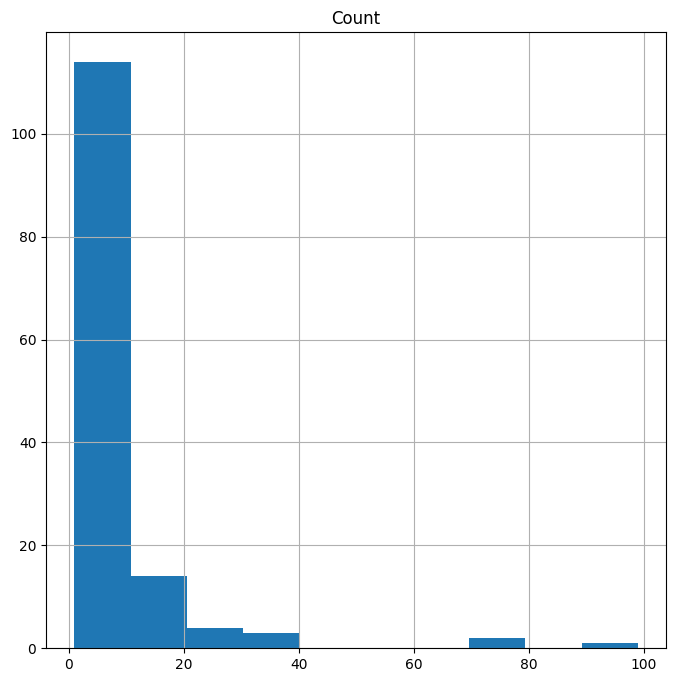

In [7]:
df_cleanedartist = pd.read_csv('clean_artist_count.csv')
df_cleanedartist.hist(figsize=(8,8));

*Answer to research question 1:* Out of 500 artists on the Rollings Stone's top 500 list, 138 artists also showed up on Spotify's most played list.


/workspace/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/workspace/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/workspace/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


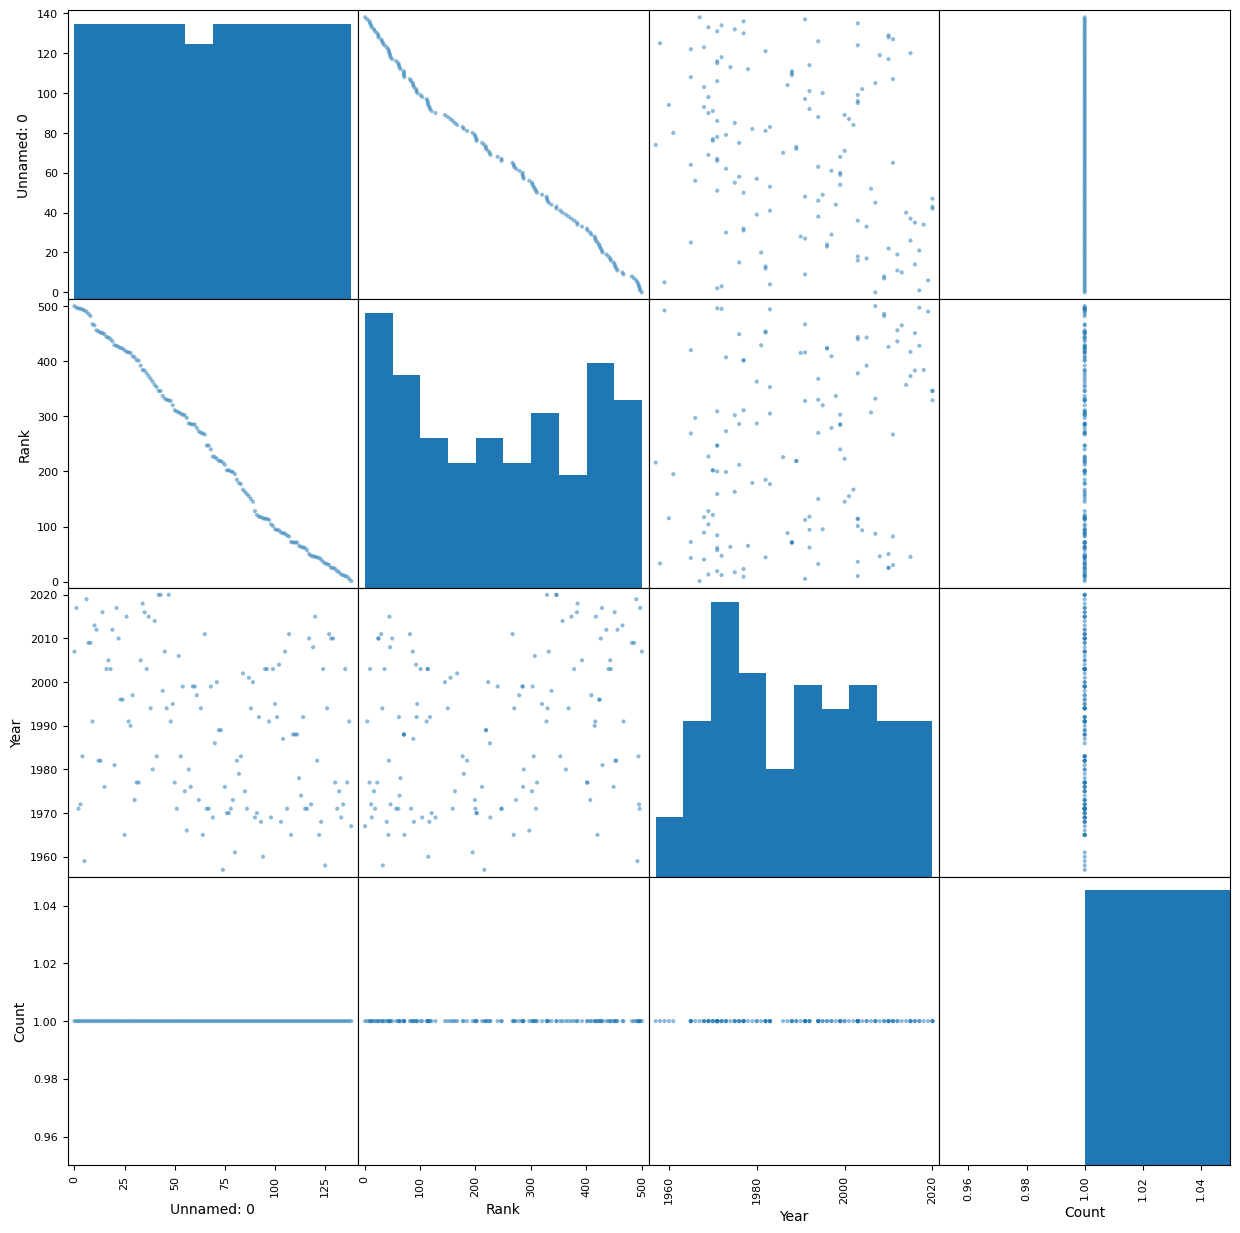

In [10]:
df_cleanedsongs = pd.read_csv('clean_song_count.csv')
pd.plotting.scatter_matrix(df_cleanedsongs, figsize=(15, 15));

*Answer to research question 2:* Out of 500 songs on the Rollings Stone's top 500 list, 139 songs also showed up on Spotify's most played list. Some songs on Spotify were done by a different artist. 

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If there was more time, I would use the year to track other metrics. One metric that might be useful is finding out which year had the most songs on the top 500 list. 